In [196]:
# import spacy
# spacy.cli.download("fr_core_news_lg")

from iads.data_traitement import traitement
from iads.nlp import preprocessing

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# I. Chargement des données :

In [197]:
df_jeux_up = pd.read_csv("../data/details_clean.csv")

In [198]:
df_avis_up = pd.read_csv("../data/avis_clean.csv")

# II. Clustering des catégories d'un jeu :

L'attribut `categories` d'un jeu est une suite de catégories séparées par des '|'

In [199]:
jeux_cat = df_jeux_up.apply(traitement.extract_categories, axis=1)

In [200]:
len(val)

21

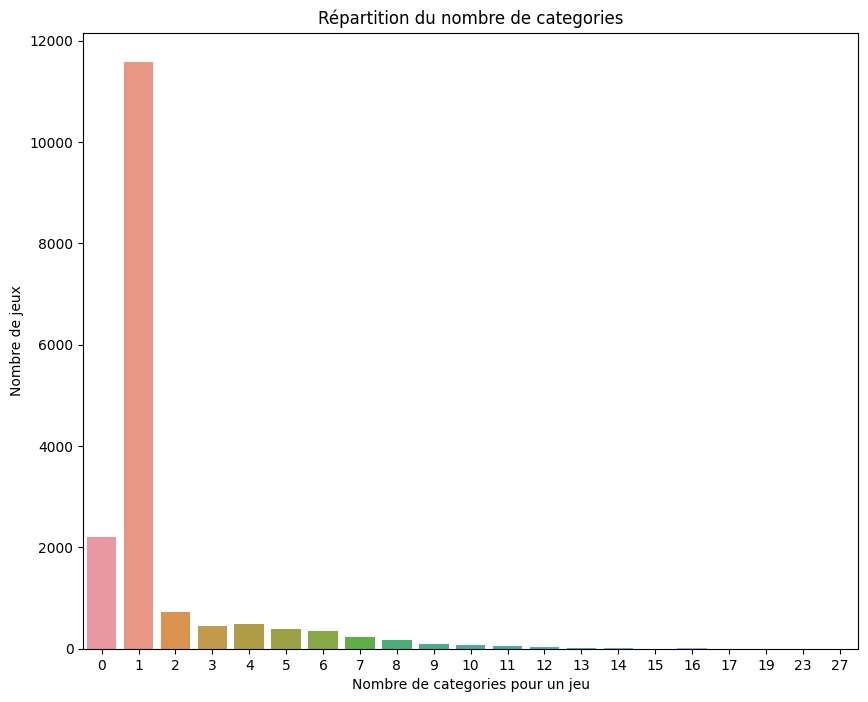

In [201]:
val, count = np.unique(jeux_cat.map(len), return_counts=True)
index = count.argsort()[::-1]
count = count[index]
val = val[index]

plt.figure(figsize=(10, 8))
sns.barplot(x = val, y =count)
plt.xlabel("Nombre de categories pour un jeu")
plt.ylabel("Nombre de jeux")
plt.title("Répartition du nombre de categories")
plt.show()

In [202]:
count[val == 0].sum() / len(jeux_cat)

0.13026729093818526

In [203]:
count[val == 1].sum() / len(jeux_cat)

0.6863628281870444

In [204]:
count[val > 1].sum() / len(jeux_cat)

0.18336988087477035

- Les majorités des jeux ont qu'une seule catégorie (68% des jeux), et environ 13% de jeux n'ont pas de catégories. 
- 18% ont plus d'une catégorie.

Avoir plusieurs catégories pour un jeu peut être dérangeant, pour des problèmes de classification entre autres.

In [205]:
cats = []
jeux_cat.map(cats.extend)
u_cats, count_cats = np.unique(cats, return_counts=True)

index      = count_cats.argsort()[::-1]
count_cats = count_cats[index]
u_cats     = u_cats[index]

In [206]:
print(f"{len(u_cats)} tag de categories")

184 tag de categories


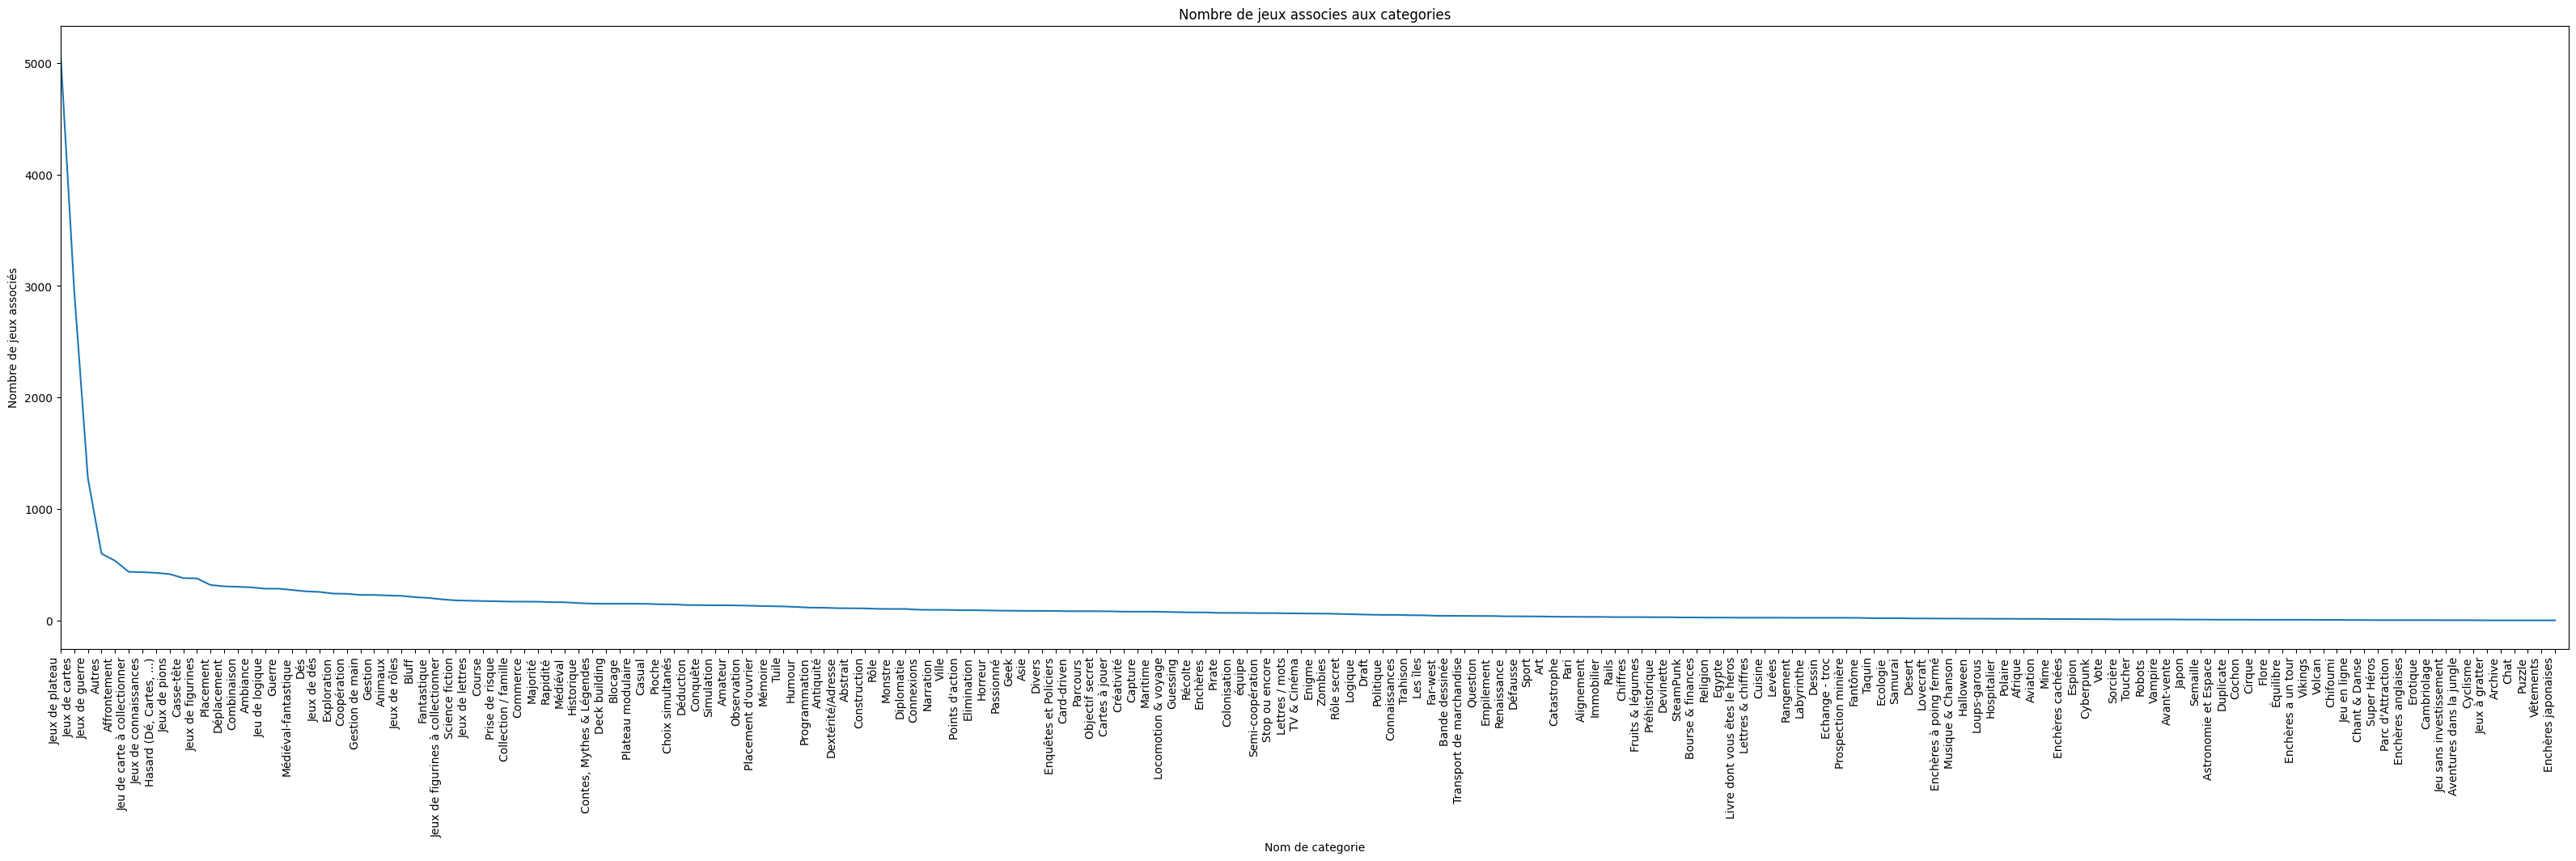

In [207]:
plt.figure(figsize=(40, 10))
plt.plot(u_cats, count_cats)
plt.xticks(rotation=90, ha='right')
plt.xlabel("Nom de categorie")
plt.ylabel("Nombre de jeux associés")
plt.title("Nombre de jeux associes aux categories")
plt.xlim((0, len(u_cats)))
plt.show()

### 1. Nettoyer les catégories : 

In [208]:
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')



In [209]:
c_cats = []

for cat in u_cats:
    cat_ = preprocessing.clean_text(cat)
    cat_tokens = preprocessing.tokenize_text(cat_)    
    cat_tokens = preprocessing.remove_stopwords(cat_tokens)
    cat_tokens = preprocessing.lemmatize_tokens(cat_tokens)
    cat_ = " ".join(cat_tokens)
    c_cats.append(cat_)

#### Mise à jour des categories des jeux

In [210]:
jeux_cat_up = jeux_cat.copy()

for i, row in jeux_cat.iteritems():
    row_ = []
    
    for cat in row:
        index = np.where(u_cats == cat)[0][0]
        row_.append(c_cats[index])
        
    jeux_cat_up[i] = np.unique(row_)
jeux_cat_up.head()

0                                                   []
1                                                   []
2    [aventure jungle, collection famille, enchere,...
3                                                   []
4    [card driven, combinaison, cooperation, deck b...
dtype: object

#### Supprimer la catégorie `autre` :

In [211]:
print("Nombre de jeux ayant autre comme catégorie :", np.where(jeux_cat_up.map(lambda l : "autre" in l), 1, 0).sum())

Nombre de jeux ayant autre comme catégorie : 599


In [212]:
jeux_cat_up = jeux_cat_up.map(lambda l : np.array(list(filter(("autre").__ne__, l))))
jeux_cat_up = jeux_cat_up.map(lambda l : np.array(list(filter(("").__ne__, l))))

In [213]:
print("Nombre de jeux ayant autre comme catégorie :", np.where(jeux_cat_up.map(lambda l : "autre" in l), 1, 0).sum())

Nombre de jeux ayant autre comme catégorie : 0


In [214]:
cats = []
jeux_cat_up.map(cats.extend)

uc_cats, count_cats = np.unique(cats, return_counts=True)

index      = count_cats.argsort()[::-1]
count_cats = count_cats[index]
uc_cats    = uc_cats[index]

In [215]:
print(f"Apres nettoyage on a {len(uc_cats)} tag de categorie")

Apres nettoyage on a 172 tag de categorie


### 2. Clustering des categories : 

In [216]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(uc_cats)
n_clusters = 155

In [217]:
kmeans = KMeans(n_clusters=n_clusters, algorithm="elkan", random_state=0)
kmeans.fit(X)

for i in range(n_clusters):
    print(f"Cluster {i}:")
    for category in np.array(uc_cats)[kmeans.labels_ == i]:
        print(f"\t{category}")

Cluster 0:
	enquete policier
	puzzle
Cluster 1:
	carte
	dé
	hasard dé carte
Cluster 2:
	transport marchandise
Cluster 3:
	gestion
	gestion main
Cluster 4:
	cambriolage
Cluster 5:
	enchere
	enchere poing ferme
	enchere cachee
	enchere tour
	enchere anglais
	enchere japonais
Cluster 6:
	placement
	placement ouvrier
Cluster 7:
	aventure jungle
Cluster 8:
	plateau
	plateau modulaire
Cluster 9:
	erotiqu
Cluster 10:
	dessin
Cluster 11:
	bourse finance
Cluster 12:
	toucher
Cluster 13:
	exploration
Cluster 14:
	card driven
Cluster 15:
	livre hero
	super hero
Cluster 16:
	passionner
Cluster 17:
	humour
Cluster 18:
	capture
Cluster 19:
	defausse
Cluster 20:
	role
Cluster 21:
	cooperation
	semi cooperation
Cluster 22:
	medieval fantastique
	fantastique
Cluster 23:
	lettre
	lettre mot
	chiffre
	lettre chiffre
Cluster 24:
	conte mythe legende
Cluster 25:
	archive
Cluster 26:
	prise risque
Cluster 27:
	tv cinemer
Cluster 28:
	cuisine
Cluster 29:
	mime
Cluster 30:
	bluff
Cluster 31:
	narration
Cluste

In [218]:
kmeans = KMeans(n_clusters=n_clusters, algorithm="elkan", random_state=0)
kmeans.fit(X)

name_clust = []
for i in range(n_clusters):
    L_clus = []
    
    for category in np.array(uc_cats)[kmeans.labels_ == i]:
        L_clus.extend(category.split(" "))
        
    noms, counts = np.unique(np.array(L_clus), return_counts=True)
    index = counts.argsort()[::-1]
    counts = counts[index]
    noms   = noms[index]   
    # print(" ".join(noms[counts == counts[0]]))
    name_clust.append(" ".join(noms[counts == counts[0]]))
    
print(name_clust)
        

['puzzle policier enquete', 'dé carte', 'transport marchandise', 'gestion', 'cambriolage', 'enchere', 'placement', 'jungle aventure', 'plateau', 'erotiqu', 'dessin', 'finance bourse', 'toucher', 'exploration', 'driven card', 'hero', 'passionner', 'humour', 'capture', 'defausse', 'role', 'cooperation', 'fantastique', 'lettre', 'mythe legende conte', 'archive', 'risque prise', 'tv cinemer', 'cuisine', 'mime', 'bluff', 'narration', 'course', 'troc echange', 'logique', 'afrique', 'duplicate', 'chat', 'antiquit', 'casual', 'cyberpunk', 'taquin', 'abstrait', 'historique', 'cochon', 'animal', 'prehistoriqu', 'conquete', 'renaissance', 'amateur', 'elimination', 'guessing', 'ligne', 'diplomati', 'trahison', 'danse chant', 'labyrinthe', 'equipe', 'robot', 'empilement', 'flore', 'pirate', 'art', 'halloween', 'espace astronomie', 'maritime', 'samurai', 'famille collection', 'vente', 'pion', 'west far', 'alignement', 'lovecraft', 'viking', 'espion', 'volcan', 'pioche', 'geek', 'deck building', 'gra

In [219]:
# reaffecter les labels au cats
jeux_cat_up_gen = jeux_cat_up.copy()
for i in range(n_clusters):
    list_tmp = np.array(uc_cats)[kmeans.labels_ == i]
    
    jeux_cat_up_gen = jeux_cat_up_gen.map(lambda l: np.array(list(map(lambda x: name_clust[i] if x in list_tmp else x, l))))



In [220]:
# recalculer le count des nouvelle categories

cats_gen = []
jeux_cat_up_gen.map(cats_gen.extend)

uc_cats_gen, count_cats_gen = np.unique(cats_gen, return_counts=True)


In [221]:
print(uc_cats_gen)

['abstrait' 'affrontement' 'afrique' 'alignement' 'amateur' 'ambiance'
 'animal' 'antiquit' 'archive' 'art' 'asie' 'aviation' 'blocage' 'bluff'
 'cambriolage' 'capture' 'casual' 'catastrophe' 'chat' 'chifoumi' 'cirque'
 'cochon' 'colonisation' 'combinaison' 'commerce' 'connaissance'
 'connexion' 'conquete' 'construction' 'cooperation' 'course' 'creativite'
 'cuisine' 'cyberpunk' 'cyclisme' 'danse chant' 'deck building'
 'deduction' 'defausse' 'deplacement' 'desert' 'dessin' 'dessinee bande'
 'devinette' 'dexterite adresse' 'diplomati' 'draft' 'driven card'
 'duplicate' 'dé carte' 'ecologie' 'egypte' 'elimination' 'empilement'
 'enchere' 'enigme' 'equilibre' 'equipe' 'erotiqu' 'espace astronomie'
 'espion' 'exploration' 'famille collection' 'fantastique' 'fantome'
 'figurine' 'finance bourse' 'flore' 'geek' 'gestion' 'gratter' 'guerre'
 'guessing' 'halloween' 'hero' 'historique' 'horreur' 'hospitalier'
 'humour' 'ile' 'immobilier' 'investissement' 'japon' 'jungle aventure'
 'labyrinthe'

# TODO :

- base de données pour regrouper tous ce qui est pays : afrique, asie, egypte ....
- et aussi pour les animaux (cochon animal ...)
- Et aussi monstre (zombie monstre vampire ...)

### 3. Sélection des N catégories principales : 

On va pondérer les catégories par leur log proba d'apparition pour estimer leur importance, et ainsi sélectionner que les principales.

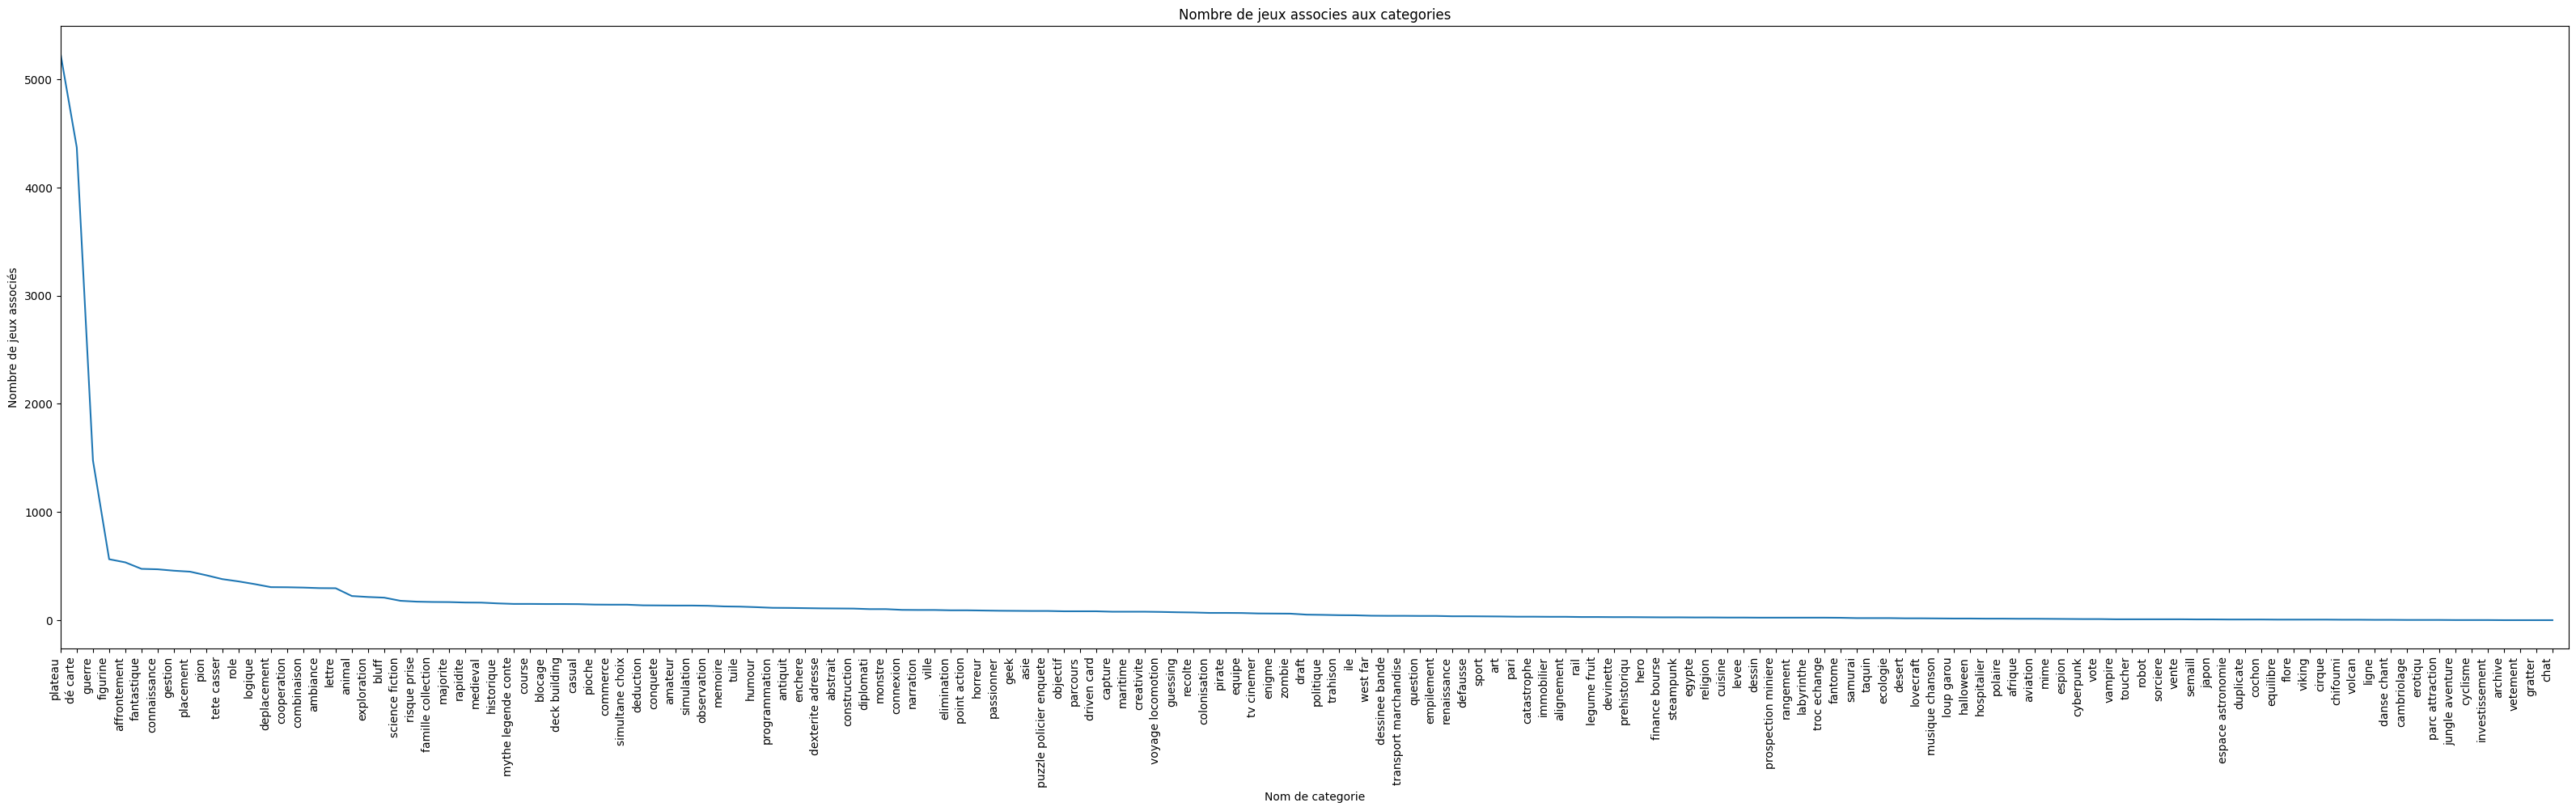

In [222]:
indice = np.argsort(-count_cats_gen)
uc_cats_gen = uc_cats_gen[indice]
count_cats_gen = count_cats_gen[indice]

plt.figure(figsize=(40, 10))
plt.plot(uc_cats_gen, count_cats_gen)
plt.xticks(rotation=90, ha='right')
plt.xlabel("Nom de categorie")
plt.ylabel("Nombre de jeux associés")
plt.title("Nombre de jeux associes aux categories")
plt.xlim((0, len(uc_cats_gen)))
plt.show()

In [223]:
# utiliser uc_cats_gen ... but why?
# index = count_cats < 500
# plt.figure(figsize=(40, 10))
# plt.plot(uc_cats[index], count_cats[index])
# plt.plot(np.full(len(uc_cats[index]), 10), label="10 jeux")
# plt.plot(np.full(len(uc_cats[index]), 50), label="50 jeux")
# plt.xticks(rotation=90, ha='right')
# plt.xlabel("Nom de categorie")
# plt.ylabel("Nombre de jeux associés")
# plt.title("Nombre de jeux associes aux categories (sans les top categories)")
# plt.xlim((0, len(uc_cats[index])))
# plt.legend()
# plt.show()

In [224]:
p_C_J = []
jeux_cat_up_gen.map(lambda l : np.isin(uc_cats_gen, l).astype(int).tolist()).map(p_C_J.append)
p_C_J = np.array(p_C_J)
p_C_J = p_C_J / p_C_J.sum()
p_C_J.shape

(16873, 155)

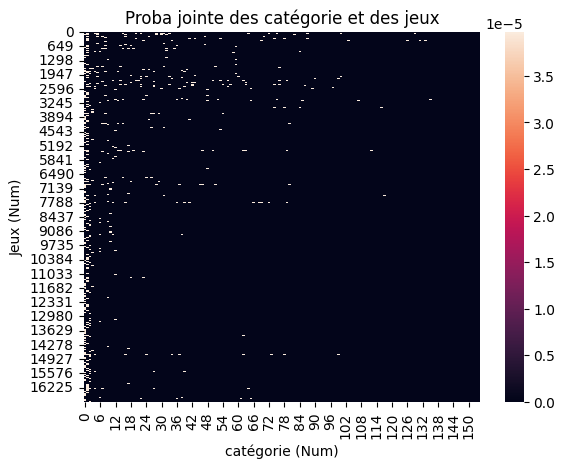

In [225]:
sns.heatmap(p_C_J)
plt.xlabel("catégorie (Num)")
plt.ylabel("Jeux (Num)")
plt.title('Proba jointe des catégorie et des jeux')
plt.show()

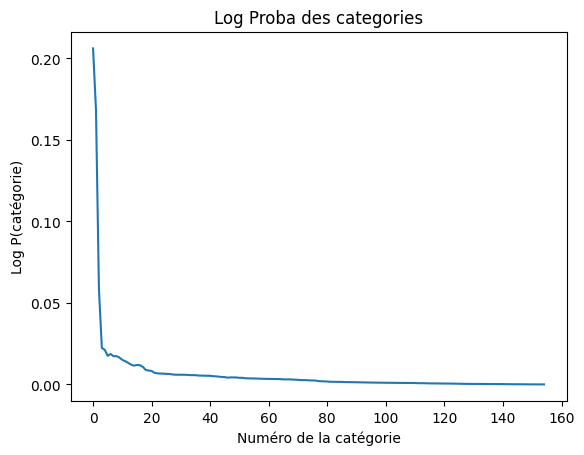

In [226]:
p_cat = p_C_J.sum(axis=0) 
plt.plot((p_cat))
plt.xlabel("Numéro de la catégorie")
plt.ylabel("Log P(catégorie)")
plt.title("Log Proba des categories")
plt.show()

In [227]:
I = []
jeux_cat_up_gen.map(lambda l : (np.isin(uc_cats_gen, l).astype(int) / (len(l) if len(l) != 0 else 1)).tolist()).map(I.append)
I = np.array(I)
I.shape

(16873, 155)

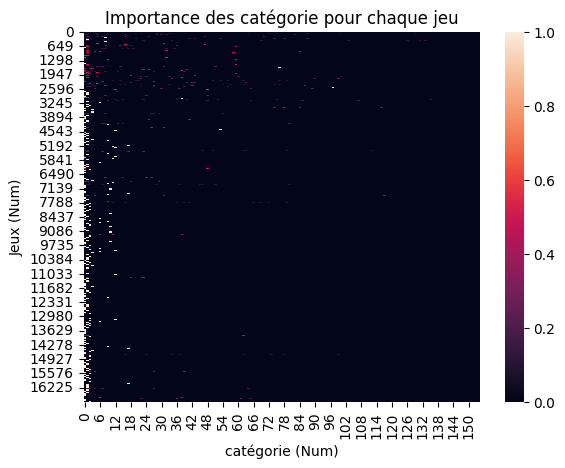

In [228]:
sns.heatmap(I)
plt.xlabel("catégorie (Num)")
plt.ylabel("Jeux (Num)")
plt.title('Importance des catégorie pour chaque jeu')
plt.show()

Soit I une mesure d'importance donné sous cette forme :

$$I(cat_i) = \frac{\sum_j\frac{Q_j(cat_i)}{\lvert L_j \rvert}}{{\sum_j Q_j(cat_i)}} \ \ avec \ Q_j(cat_i) = 1 \ si \ cat_i \in L_j$$

In [229]:
Q = []
jeux_cat_up_gen.map(lambda l : np.isin(uc_cats_gen, l).astype(int).tolist()).map(Q.append)
Q = np.array(Q)
Q = Q.sum(axis=0)
Q

array([5191, 4232, 1476,  564,  535,  443,  471,  436,  438,  416,  380,
        359,  334,  306,  291,  302,  297,  273,  224,  215,  209,  180,
        172,  169,  168,  164,  163,  156,  151,  151,  150,  150,  149,
        145,  144,  144,  138,  137,  136,  136,  134,  128,  126,  121,
        115,  114,  105,  110,  109,  108,  103,  103,   96,   95,   95,
         92,   92,   90,   88,   87,   86,   86,   83,   83,   83,   79,
         79,   79,   77,   74,   72,   68,   68,   67,   63,   62,   61,
         52,   50,   47,   46,   42,   41,   41,   40,   40,   37,   37,
         36,   35,   33,   33,   32,   32,   30,   30,   29,   29,   28,
         27,   27,   26,   26,   25,   25,   24,   24,   24,   24,   24,
         23,   20,   20,   20,   18,   18,   17,   16,   16,   15,   15,
         14,   14,   13,   12,   11,   11,    9,    9,    9,    9,    9,
          8,    8,    7,    7,    7,    6,    6,    6,    6,    5,    5,
          4,    4,    3,    3,    3,    2,    2,   

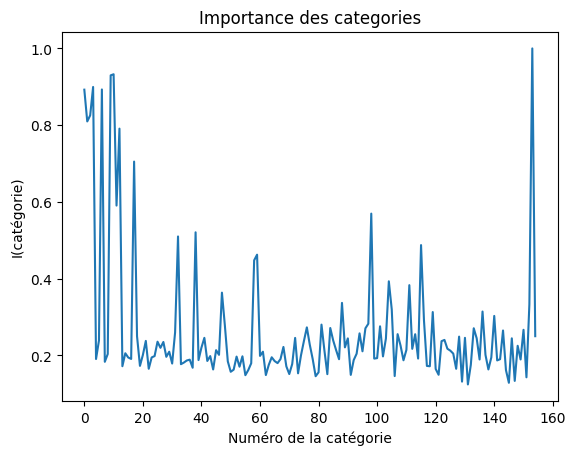

In [230]:
I_cat = I.sum(axis=0) / Q
plt.plot(I_cat)
plt.xlabel("Numéro de la catégorie")
plt.ylabel("I(catégorie)")
plt.title("Importance des categories")
plt.show()

In [231]:
jeux_cat_up_I = jeux_cat_up_gen.copy()
l_uc_cats = list(uc_cats_gen)

for j, row in jeux_cat_up_gen.iteritems():
        
    if len(row) == 0:
        continue
        
    I_j = np.zeros(len(l_uc_cats))
    for cat in row:
        i = l_uc_cats.index(cat)
#         I_j[i] = I_cat[i]
        I_j[i] = Q[i]
        
    i_max = np.argmax(I_j)
    jeux_cat_up_I[j] = [l_uc_cats[i_max]]

In [232]:
cats = []
jeux_cat_up_I.map(cats.extend)

one_uc_cats, count_cats = np.unique(cats, return_counts=True)

index       = count_cats.argsort()[::-1]
count_cats  = count_cats[index]
one_uc_cats = one_uc_cats[index]

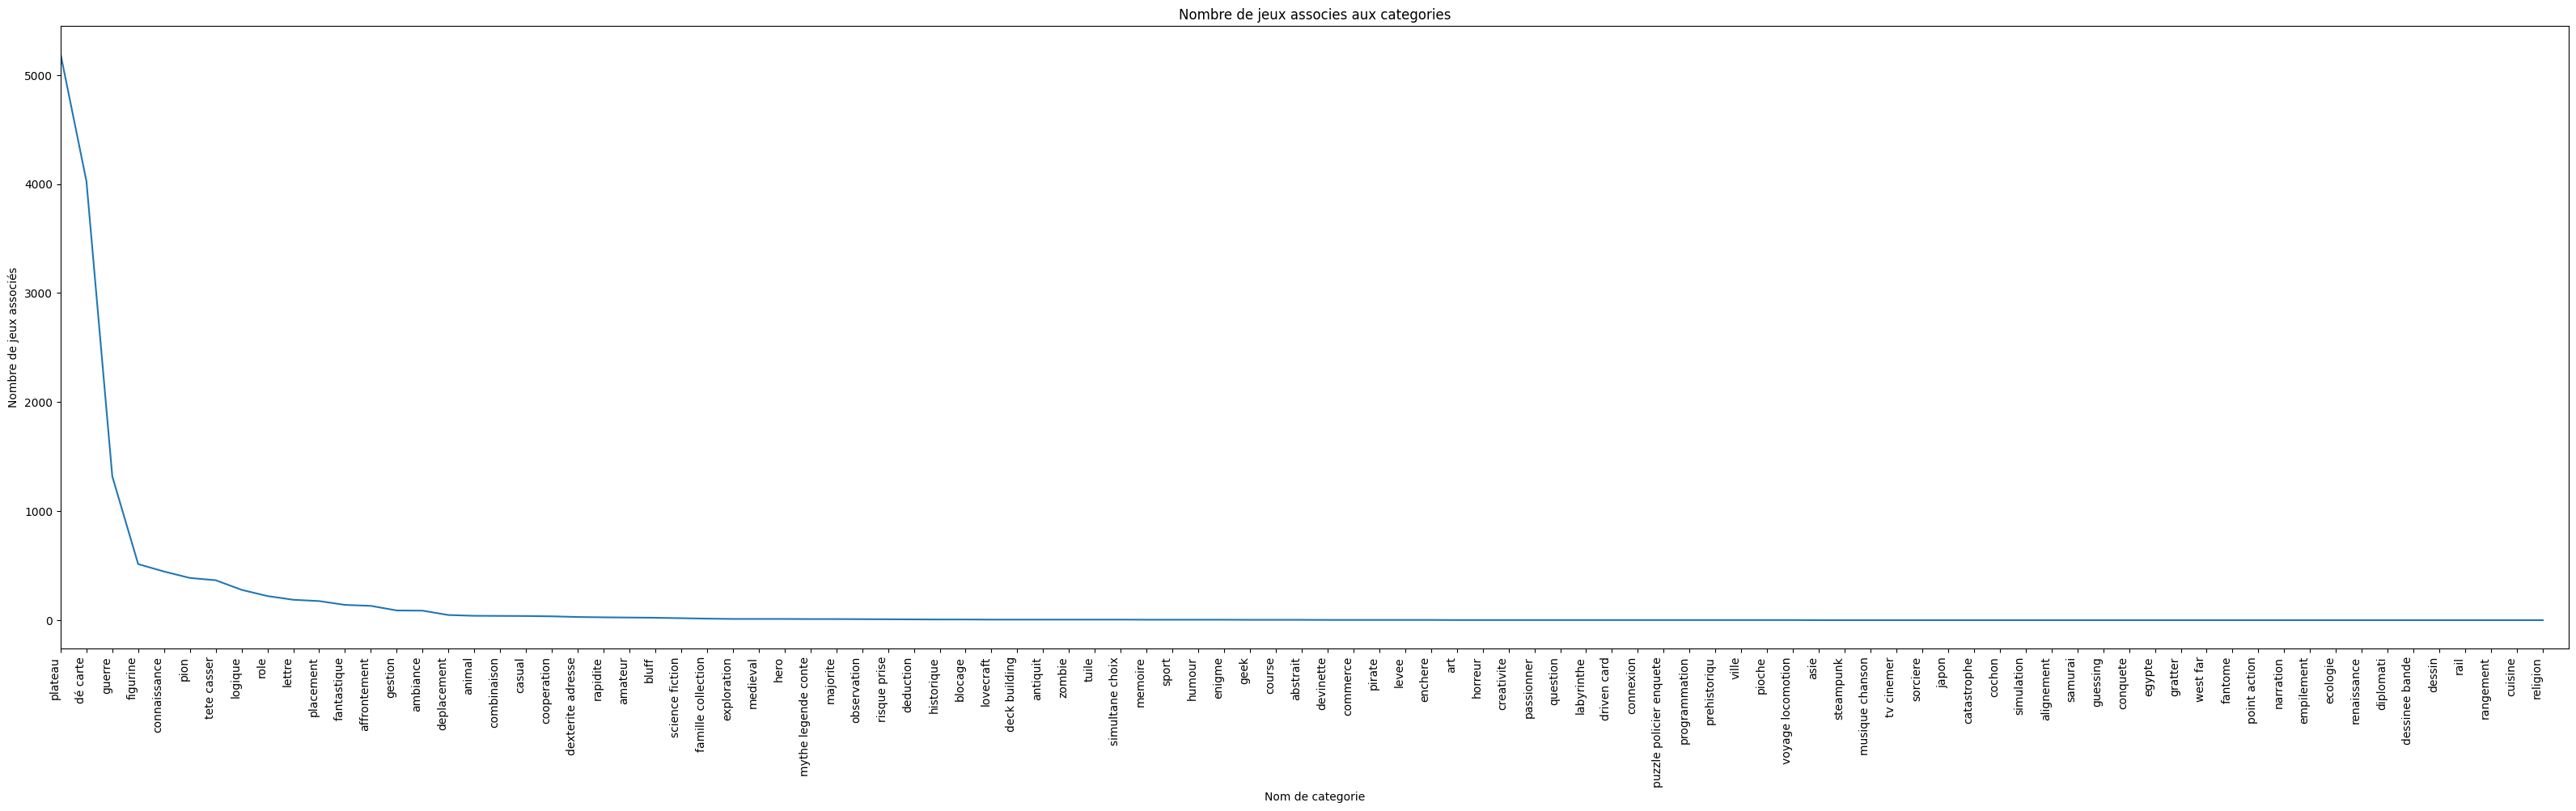

In [233]:
plt.figure(figsize=(40, 10))
plt.plot(one_uc_cats, count_cats)
plt.xticks(rotation=90, ha='right')
plt.xlabel("Nom de categorie")
plt.ylabel("Nombre de jeux associés")
plt.title("Nombre de jeux associes aux categories")
plt.xlim((0, len(one_uc_cats)))
plt.show()

In [234]:
set(uc_cats) - set(one_uc_cats)

{'afrique',
 'archive',
 'astronomie espace',
 'aventure jungle',
 'aviation',
 'bande dessinee',
 'bourse finance',
 'cambriolage',
 'capture',
 'card driven',
 'carte',
 'casser tete',
 'chant danse',
 'chat',
 'chiffre',
 'chifoumi',
 'choix simultane',
 'cirque',
 'collection famille',
 'colonisation',
 'construction',
 'conte mythe legende',
 'cyberpunk',
 'cyclisme',
 'defausse',
 'desert',
 'draft',
 'duplicate',
 'dé',
 'echange troc',
 'elimination',
 'enchere anglais',
 'enchere cachee',
 'enchere japonais',
 'enchere poing ferme',
 'enchere tour',
 'enquete policier',
 'equilibre',
 'equipe',
 'erotiqu',
 'espion',
 'far west',
 'flore',
 'fruit legume',
 'gestion main',
 'halloween',
 'hasard dé carte',
 'hospitalier',
 'ile',
 'immobilier',
 'investissement',
 'lettre chiffre',
 'lettre mot',
 'ligne',
 'livre hero',
 'locomotion voyage',
 'loup garou',
 'maritime',
 'medieval fantastique',
 'mime',
 'monstre',
 'objectif',
 'parc attraction',
 'parcours',
 'pari',
 'place

In [235]:
print(count_cats)

[5191 4025 1319  515  447  388  367  279  222  188  176  141  132   90
   88   48   41   40   39   36   30   27   25   23   19   15   12   12
   12   11   11   10    9    8    7    7    6    6    6    6    6    6
    5    5    5    5    4    4    4    3    3    3    3    3    2    2
    2    2    2    2    2    2    2    2    2    2    2    2    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1]


In [238]:
supp = 6
print("categories non supp :\n\n", one_uc_cats[count_cats > supp])
print("\n nombre de categories distinct restantes : ", len(one_uc_cats[count_cats > supp]))
print("\n nombre de categories totales : ", sum(count_cats))
print("\n nombre de jeux sans cat resultant : ", sum(count_cats[count_cats <= supp]))
print("\n nombre de categories restantes : ", sum(count_cats[count_cats > supp]))



categories non supp :

 ['plateau' 'dé carte' 'guerre' 'figurine' 'connaissance' 'pion'
 'tete casser' 'logique' 'role' 'lettre' 'placement' 'fantastique'
 'affrontement' 'gestion' 'ambiance' 'deplacement' 'animal' 'combinaison'
 'casual' 'cooperation' 'dexterite adresse' 'rapidite' 'amateur' 'bluff'
 'science fiction' 'famille collection' 'exploration' 'medieval' 'hero'
 'mythe legende conte' 'majorite' 'observation' 'risque prise' 'deduction'
 'historique' 'blocage']

 nombre de categories distinct restantes :  36

 nombre de categories totales :  14150

 nombre de jeux sans cat resultant :  140

 nombre de categories restantes :  14010


### TODO : Seuillage ? pour séléctionner les N (remplacer les drop par `autre`)

## Résultat intéressant ! TODO

- Ajouter quelques mots dans le sw pour affiner et sélectionner les catégories les plus importantes pourrait vraiment donner de (très) bons résultats.